https://codewords.recurse.com/issues/six/image-processing-101

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image format

Alright! Let’s get started. Firstly, we’ll need to read in images and to understand the format in which they are represented to us.

In OpenCV, images are represented as 3-dimensional Numpy arrays. An image consists of rows of pixels, and each pixel is represented by an array of values representing its color.

Given an image above, the array representation of it will be:

In [3]:
# read an image
img = cv2.imread('/home/rahul/image-data/cats1.jpeg')

In [4]:
img.shape

(164, 307, 3)

In [5]:
img[100][150 : 160]

array([[146, 160, 182],
       [186, 202, 219],
       [213, 229, 242],
       [210, 226, 238],
       [218, 234, 246],
       [236, 249, 255],
       [191, 201, 225],
       [ 53,  60,  93],
       [ 19,  24,  63],
       [ 61,  64, 108]], dtype=uint8)

Note that OpenCV loads an image in BGR format by default. Matplotlib, however, reads in images as RGB. To display an image in matplotlib, we will need to convert the BGR format to RGB. I’ll let you figure out what happens when you forget to do the conversion before passing the image in to matplotlib.

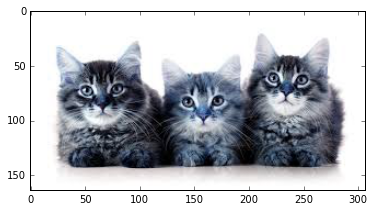

In [6]:
plt.imshow(img)

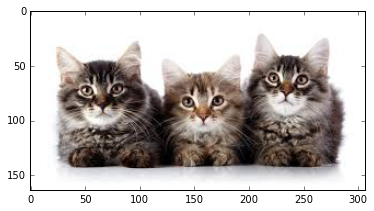

In [7]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)

### Colors

Wait, hold up, hold up. What’s the reason for all this business with BGR and RGB?

### Red, Green and Blue (RGB)

In the digital world, colors are commonly represented using the RGB color model. By this color model, red, green and blue light can be added together in various ways to produce a range of colors on the visible spectrum. Each one of thse colors are referred to as a channel. This works slightly differently than, say, mixing paint colors.

I won’t go too much into the technicalities, but Wikipedia has a section on how the color combinations work. (http://www.wikiwand.com/en/RGB_color_model#/Additive_primary_colors)

On most systems, RGB values are represented as values ranging from 0 to 255, with higher values corresponding to a higher intensity of that color channel. For example, we can guess that [255, 51, 0] is probably a reddish color, because its R channel is the highest, and that [51, 102, 0] is probaby a greenish color, with the G channel being the highest.

### Hue, Saturation and Value (HSV)

Another useful color model is the HSV color model. Instead of representing colors by the red, green and blueness of it, we represent them by the hue (where it is on the range of the rainbow), saturation (the ‘colorfulness’ of the color) and value (also known as brightness, or how much perceived light is coming out of it).

The HSV color model is especially useful when you want to think of an image’s color in either one of those channels, e.g. looking for parts of an image that fall in the blue hue range.

A variation of the HSV is the HSL color model, which consists of the hue, saturation and lightness. It is similar to HSV, but differs in the definition of saturation and the third channel (value vs lightness)2

### Grayscale

We will also be working with grayscale images. Grayscale images only have one color channel on the scale of 0 to 255, representing the brightness of that pixel, with 0 being totally dark (black) and 255 being totally bright (white).

Converting the image we have into grayscale gives us this 2-dimensional array:

In [8]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


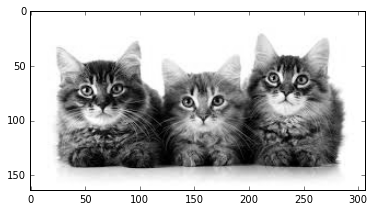

In [9]:
# show image with matplotlib
plt.imshow(gray_img, cmap='gray')

#### Exercise:

Knowing this, we can now find the average color of an image! If we averaged each of the R, G and B channels, it will give us an RGB value that is the average pixel color. Here’s an example of how it can be done with np.average().

In [10]:
# find average per row, assuming image is already in the RGB format.
# np.average() takes in an axis argument which finds the average across that axis.
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)

print(average_color)

[182 175 172]


In order to display a color on matplotlb, we need to create a small 100x100 pixel image populated with that RGB value.

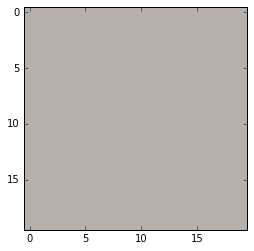

In [11]:
average_color_img = np.array([[average_color] * 20] * 20, np.uint8)

plt.imshow(average_color_img)

### Segmentation

When we’re trying to gather information about an image, we’ll first need to break it up into the features we are interested in. This is called segmentation. Image segmentation is the process representing an image in segments to make it more meaningful for easier to analyze.

### Thresholding

One of the simplest ways of segmenting an image is thresholding. The basic idea of thresholding is to replace each pixel in an image with a white pixel if a channel value of that pixel exceeds a certain threshold, and a black pixel if it doesn’t. We typically convert an image into a binary image, i.e. a single channel image. Grayscale images are examples of single channel images.

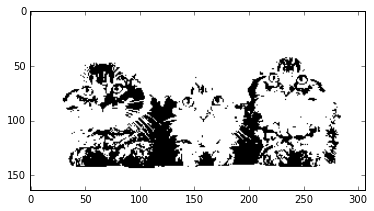

In [12]:
# threshold for image, with threshold 60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

# show image
# show image with matplotlib
plt.imshow(threshold_img, cmap='gray')

This makes it easy to single out parts of the image that are of different brightness. This doesn’t only have to apply to grayscale versions of images. We can also segment out parts of images by color channels. Color thresholding works best with HSV. We talked about how HSV has a hue channel, that is, on the scale from red to green to blue to magenta, where does the color of the pixel lie?

Rather than finding the value that is under a threshold, we can find parts of the image with hues that lie within a range with cv2.inRange().

In [13]:
# open new Mondrian Piet painting photo
piet = cv2.imread('/home/rahul/image-data/piet.png')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

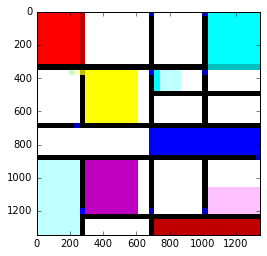

In [14]:
plt.imshow(cv2.cvtColor(piet, cv2.COLOR_BGR2RGB))

<b>
Note: For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges. 
</b>

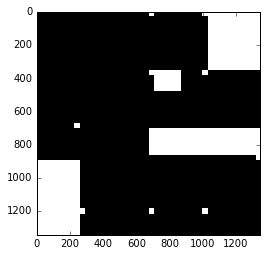

In [15]:
# threshold for hue channel in blue range
blue_min = np.array([80, 50, 50], np.uint8)
blue_max = np.array([140, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

plt.imshow(threshold_blue_img, cmap='gray')

### Masking with a binary threshold

Now that we can identify colors, we can do interesting things like using the binary image as a mask. A mask is a matrix of zero and non-zero values used for a bitwise operation. Masks can be used to cut, or ‘mask’, out certain sections of an image. A mask is usually a matrix of zeros (for the parts to exclude) and non-zeros (for the parts we want to keep).

Let’s say I would like a version of an image of an outdoor landscape that excludes the sky. We can first find the pixels that are within range of the blue hue, which will identify the blue-sky parts of an image. To get the parts of the image that are not the sky, we can inverse the values with a bitwise_not, which leaves us the parts that are not blue, giving us our mask. Performing a bitwise_and on that mask with an image will leave only the parts that are not blue.

In [16]:
def mask_img(img_path, min_hsv, max_hsv):
    upstate = cv2.imread(img_path)
    upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
    #plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))
    
    # get mask of pixels that are in blue range
    mask_inverse = cv2.inRange(upstate_hsv, min_hsv, max_hsv)

    # inverse mask to get parts that are not blue
    mask = cv2.bitwise_not(mask_inverse)

    #plt.imshow(mask, cmap='gray')
    
    # convert single channel mask back into 3 channels
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

    # perform bitwise and on mask to obtain cut-out image that is not blue
    masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

    # replace the cut-out parts with white
    masked_replace_white = cv2.addWeighted(masked_upstate, 1, cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

    plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

In [17]:
def draw_orig_img(img_path):
    upstate = cv2.imread(img_path)    
    plt.imshow(cv2.cvtColor(upstate, cv2.COLOR_BGR2RGB))

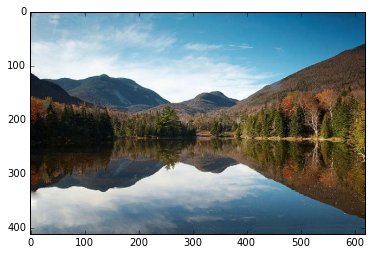

In [18]:
draw_orig_img('/home/rahul/image-data/upstate-ny.jpg')

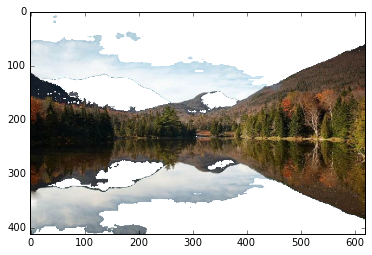

In [19]:
mask_img('/home/rahul/image-data/upstate-ny.jpg', blue_min, blue_max)

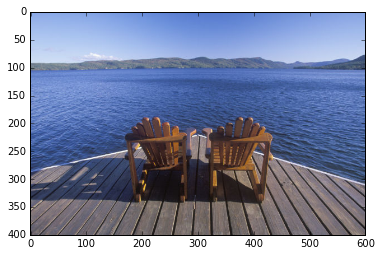

In [20]:
draw_orig_img('/home/rahul/image-data/upstate-ny-2.jpg')

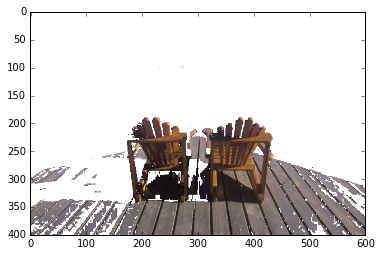

In [21]:
mask_img('/home/rahul/image-data/upstate-ny-2.jpg', min_hsv=np.array([80,0,0], np.uint8), 
          max_hsv=np.array([140,255,255], np.uint8))

### Blurring

Photographs can be quite noisy, which means there can be small irregularities that may get in the way of image segmenting. A common way to get rid of the noisy bits is to preprocess the image with a Gaussian blur. You can think of blurring as a way of smoothing out high intensities or drastic changes between pixels.

Gaussian blurs work by applying transformations to each pixel in an image. This is done by convolving an image with an n x n-sized kernel. You can think of a convolution as an act of applying an operation on a pixel depending to the values of the n x n pixels around it. The operation is defined by the kernel. So on a Gaussian blur with a 5 x 5 kernel, for every pixel, the 5 x 5 surrounding pixels are considered, and an averaging calculation is performed that will give us the pixels’ new, blurred color. The bigger the Gaussian kernel size, the more blurred the image will be.

In [22]:
img_path = '/home/rahul/image-data/scenery.jpg'

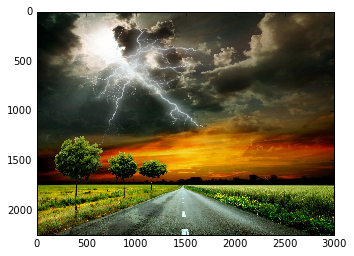

In [23]:
draw_orig_img(img_path)

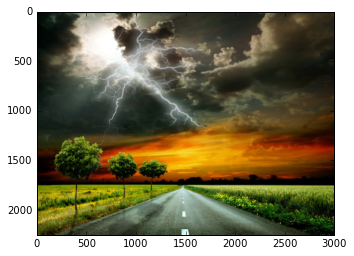

In [24]:
img = cv2.imread(img_path)
blur = cv2.GaussianBlur(img, (25,25), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

In [25]:
img.shape

(2250, 3000, 3)

In [26]:
img_path = '/home/rahul/image-data/water-logo.png'

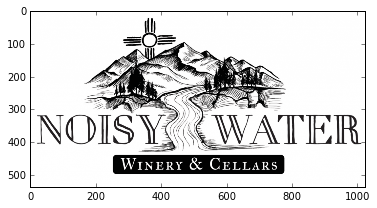

In [27]:
draw_orig_img(img_path)

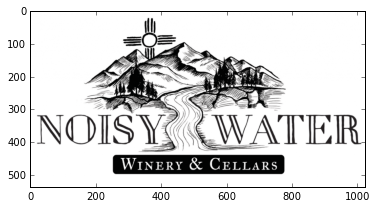

In [28]:
img = cv2.imread(img_path)
blur = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

In [29]:
img.shape

(537, 1024, 3)

<i>
Gaussian blurring is especially useful when you have a noisy image and would like to smooth over all of those irregularities before performing a thresholding.
</i>

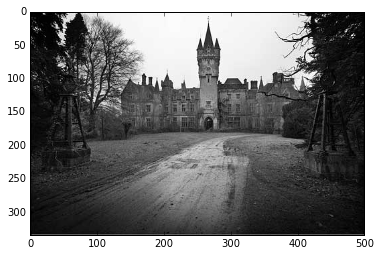

In [30]:
noisy_img = cv2.imread('/home/rahul/image-data/noisy.jpg')
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))

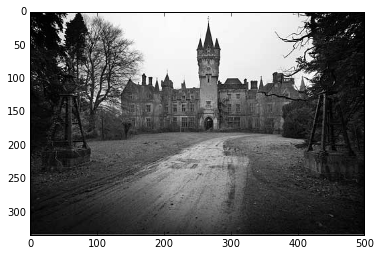

In [31]:
noisy_gray = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
plt.imshow(noisy_gray, cmap='gray')

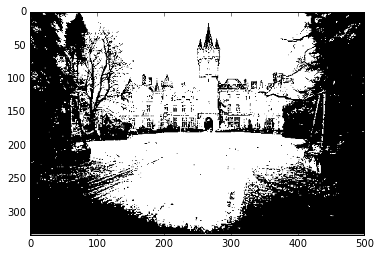

In [32]:
_, noisy_threshold = cv2.threshold(noisy_gray, 60, 255, cv2.THRESH_BINARY)
plt.imshow(noisy_threshold, cmap='gray')

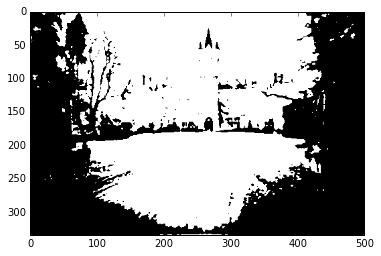

In [33]:
noisy_blur = cv2.GaussianBlur(noisy_img, (5,5), 0)
_, noisy_threshold = cv2.threshold(cv2.cvtColor(noisy_blur, cv2.COLOR_BGR2GRAY), 60, 255, cv2.THRESH_BINARY)
plt.imshow(noisy_threshold, cmap='gray')

Further reading

Gaussian Blurring explained on Wikipedia (https://www.wikiwand.com/en/Gaussian_blur)

Smoothing images explained on OpenCV (http://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html#gsc.tab=0)

### Contours and Bounding Rectangles

Now that we have simplified, binary versions of those images, we can use them to identify features of interest. As an example, let’s look at how we can identify the individual coins in an image.

In this section, we will see how we can use contours and bounding rectangles to segment out features.

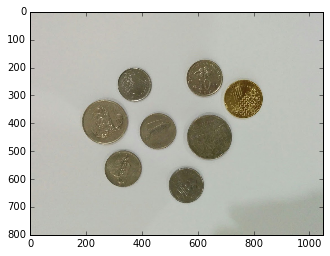

In [34]:
coins_img = cv2.imread('/home/rahul/image-data/coins-orig.jpg')
plt.imshow(cv2.cvtColor(coins_img, cv2.COLOR_BGR2RGB))

### Preprocess image

First, we’ll convert the image to grayscale and will perform a Gaussian blur on it to simplify it and to remove noise. This is a common form of preprocessing, and if often the first step in working with an image.

Then, we’ll perform a binary threshold on the preprocessed image. Since the coins are on a light background, the threshold will pick up the lighter background as the feature of interest. We’ll invert the binary image to pick up the coins.

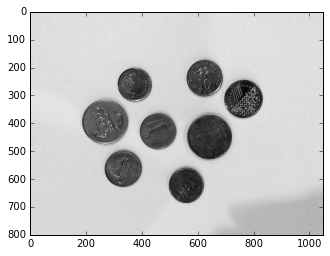

In [35]:
coins_gray = cv2.cvtColor(coins_img, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(coins_preprocessed, cmap='gray')

In [36]:
# get binary image
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

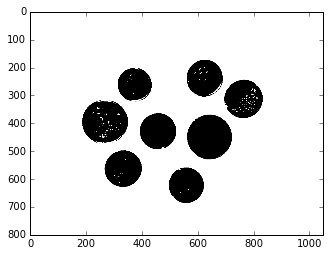

In [37]:
plt.imshow(coins_binary, cmap='gray')

In [38]:
# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)

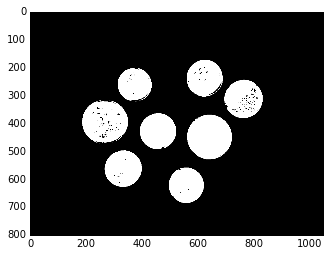

In [39]:
plt.imshow(coins_binary, cmap='gray')

### Find contours

Contours are curves joining all the continuous points that have the same color or intensity along a boundary. They’re useful for object or feature detection as well as shape analysis4. Using <b>cv2.findContours()</b>, we’ll find the contour of each coin. Passing in the <b>cv2.RETR_EXTERNAL</b> flag to the function returns only the external contours, so it won’t pick up contours for the smaller details on the coin surface.

From those contours, we’ll find the area of each, and filter out the ones that are too small to be coins. Images from real life are rarely perfect, and checks like this are often necessary to filter out noise and outliers. To obtain the area of the contour, we’re using <b>cv2.contourArea()</b>.

In [40]:
# find contours
_, coins_contours, _ = cv2.findContours(coins_binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
# make copy of image
coins_and_contours = coins_img.copy()

In [42]:
# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

In [43]:
# draw contours
cv2.drawContours(coins_and_contours, large_contours, -5, (255,0,0))

# print number of contours
print('number of coins: %d' % len(large_contours))

number of coins: 8


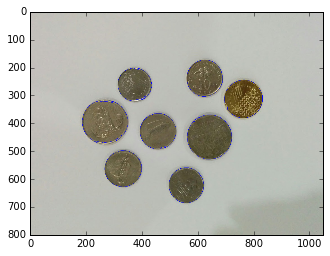

In [44]:
plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))

### Find bounding rectangles

A bounding rectangle is the smallest rectangle that can contain a contour. We can use them to segment out individual coins in our image. Do note that the <i>cv2.boundingRect()</i> method returns the bounding rectangle as x and y coordinates of the top left corner of the rectangle, and its width and height. We can also use bounding rectangles to crop out the eight individual coins.

In [45]:
# create copy of image to draw bounding boxes
bounding_img = coins_img.copy()

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

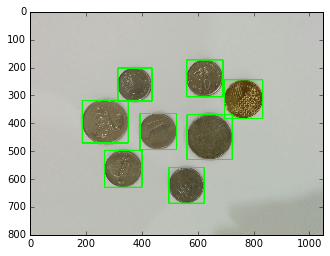

In [47]:
plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))

Further reading

Understanding [contours and contour hierarchy](http://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html#gsc.tab=0)

Other types of [contour features](http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html), including contour area and bounding rectangles

### Edge detection

Sometimes segmenting via color or intensity as we did with binary thresholding isn’t sufficient. What if we needed to segment out a multicolored object? Think about a blue and yellow striped bowl under non-uniform light – its color is not uniform throughout.

In comes edge detection, a way of finding edges in an image. Edges are defined as points in an image where there is a change in brightness or intensity, which usually means a boundary between different objects. Edge detection is a fundamental part of image processing and is often a starting point for detecting and working with features5.

There is quite a bit of math behind edge detection, but we won’t go into that here. The basic idea behind edge detection is that we can measure changes in the brightness of areas of an image, which we call the gradient. We can measure both the magnitude (how drastic the change is) and direction of a gradient. If the magnitude of change at a set of points exceeds a given threshold, then it can be considered an edge.

The Canny edge detection algorithm is a popular edge detection algorithm that produces accurate, clean edges. Below is an example of its OpenCV implementation in action, compared to a binary threshold of the same image. Note that the non-uniform lighting on the image makes it impossible to pick out both the bowl and cups with simple thresholding.

In [48]:
cups_img = cv2.imread('/home/rahul/image-data/cups-orig.jpg')

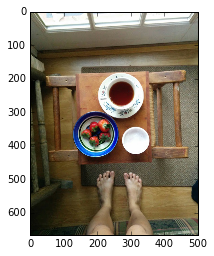

In [55]:
plt.imshow(cv2.cvtColor(cups_img, cv2.COLOR_BGR2RGB))

### Binary threshold

As standard practice, we’ll preprocess the image with grayscaling and blurring before performing the thresholding. Note how the topmost teacup cannot be captured with simple thresholding. Even if we adjust the threshold value to be much higher to capture the teacup, it will exclude the bowl.

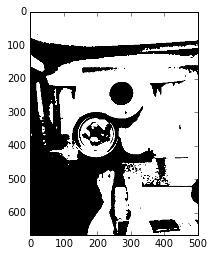

In [61]:
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups_img, (7,7), 0), cv2.COLOR_BGR2GRAY)

# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 80, 255, cv2.THRESH_BINARY)
plt.imshow(cups_thresh, cmap='gray')

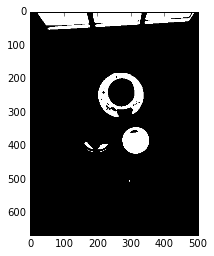

In [62]:
# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 200, 255, cv2.THRESH_BINARY)
plt.imshow(cups_thresh, cmap='gray')

### Canny edges

Instead of thresholding, let’s perform Canny edge detection on the image. Note that the cv2.Canny() function takes in two thresholds – the algorithm does what is called double thresholding. If the gradient magnitude is higher than threshold2, it is accepted as a strong edge. If it is lower than threshold2 but higher than threshold1, it will also be considered an edge, albeit a weak one if it is connected to another strong edge.

True

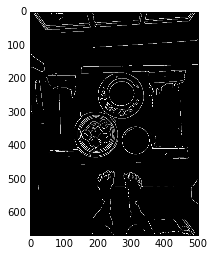

In [65]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('/home/rahul/image-data/cups-edges.jpg', cups_edges)

Canny edge detection does a much better job at picking out features of an image that are otherwise not detected by a simple binary threshold.

Edges are pretty cool and make for interesting effects, but what can do with them?

### Line and shape detection

If our objects of interest are of regular shapes like lines and circles, we can use Hough Transforms to detect them.

<b><i>Line Detection</b></i>

The <b>Hough Line Transform</b> works by coming up with a list of probable lines that points can be on, where each line is defined in polar coordinate terms of <b>r</b> and <b>theta</b> as <b></i>r = x * cos (theta) + y * sin (theta)</b></i>. If a probable line has enough other points on it, then it is considered a line.

Here is an example of the Hough Line Transform in action.

In [77]:
# copy of image to draw lines
cups_lines = np.copy(cups_img)

# find hough lines
num_pix_threshold = 110 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)

lines = [x[0] for x in lines]
for rho, theta in lines:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(cups_lines, (x1,y1), (x2,y2), (0,0,255), 1)

True

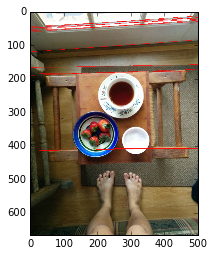

In [78]:
plt.imshow(cv2.cvtColor(cups_lines, cv2.COLOR_BGR2RGB))
cv2.imwrite('/home/rahul/image-data/cups-lines.jpg', cups_lines)

### Circle Detection

The [Circle Hough Transform](https://www.wikiwand.com/en/Circle_Hough_Transform) works similarly, but searches for all a, b, and r values that make for possible circles where circles are defined as ( x - a ) ^ 2 + ( y - b ) ^ 2 = r ^ 2. As they have extremely large search spaces, we should ideally set boundaries for the search space (e.g. setting minimum or maximum radius values).

Here is an example of the Circle Hough Transform in action:

number of circles detected: 3


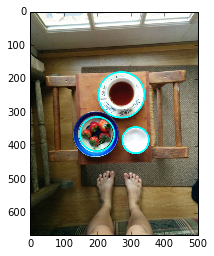

In [88]:
# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups_img)

# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    # note: cv2.HoughCircles returns circles nested in an array.
    # the OpenCV documentation does not explain this return value format
    circles = circles[0]
    for (x, y, r) in circles:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))
    cv2.imwrite('/home/rahul/image-data/cups-circles.jpg', cups_circles)

print('number of circles detected: %d' % len(circles[0]))

Note that only one circle is detected for the bowl, as we specified that the minimum distance, minDist between circles must be at least 50 pixels.

## What Next ?

Cool! Now that you know some of the basics, you should hopefully be in a good place to start thinking about your own image processing projects. And even if you don’t have a project in mind, just playing around with the different OpenCV features with different parameters is great way to familiarize yourself with it further.

If you’d like to delve deeper to how these features work (e.g. how does edge detection actually happen?), implementing them in a language of your choice can be a rewarding learning experience. For example, I didn’t fully understand edge detection until I worked on a JavaScript implementation. Don’t let the math scare you! Reading pseudocode will often give you a pretty good understanding of the logic behind the algorithms.